# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler


from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [3]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [4]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [5]:
data['quality'].value_counts()

quality
2    2198
1    1457
3     880
0     183
4     180
Name: count, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주 설정
* x, y 나누기

In [6]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능 비교

In [10]:
n = x_train.shape[1]
n

11

### (1) 모델1

In [20]:
clear_session()

model = Sequential([Dense(32, input_shape=(n,), activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(5, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
Total params: 1093 (4.27 KB)
Trainable params: 1093 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')

hist1 = model.fit(x_train, y_train, epochs=100, validation_split=.2, verbose=0).history

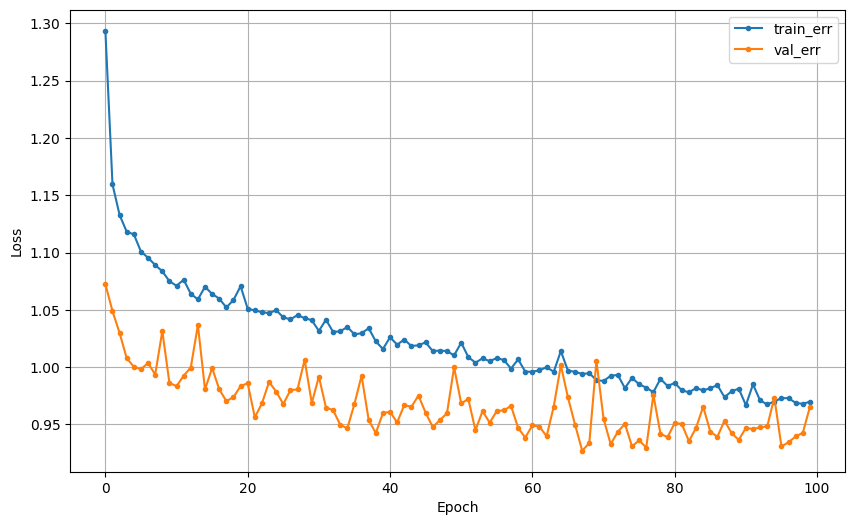

In [22]:
dl_history_plot(hist1)

In [23]:
pred = model.predict(x_val)
pred = pred.argmax(axis=1)
pred[:5]

46/46 [==============================] - 0s 2ms/step


array([3, 2, 2, 2, 3])

In [24]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[ 10  32  19   0   0]
 [  6 221 201  10   0]
 [  3 101 423 133   0]
 [  0   5 108 137   0]
 [  0   0  19  41   1]]
              precision    recall  f1-score   support

           0       0.53      0.16      0.25        61
           1       0.62      0.50      0.55       438
           2       0.55      0.64      0.59       660
           3       0.43      0.55      0.48       250
           4       1.00      0.02      0.03        61

    accuracy                           0.54      1470
   macro avg       0.62      0.37      0.38      1470
weighted avg       0.57      0.54      0.52      1470



### (2) 모델2

In [72]:
clear_session()

model2 = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                     Dense(5, activation='softmax')])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model2.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')

hist2 = model2.fit(x_train, y_train, epochs=100, validation_split=.2, verbose=0).history

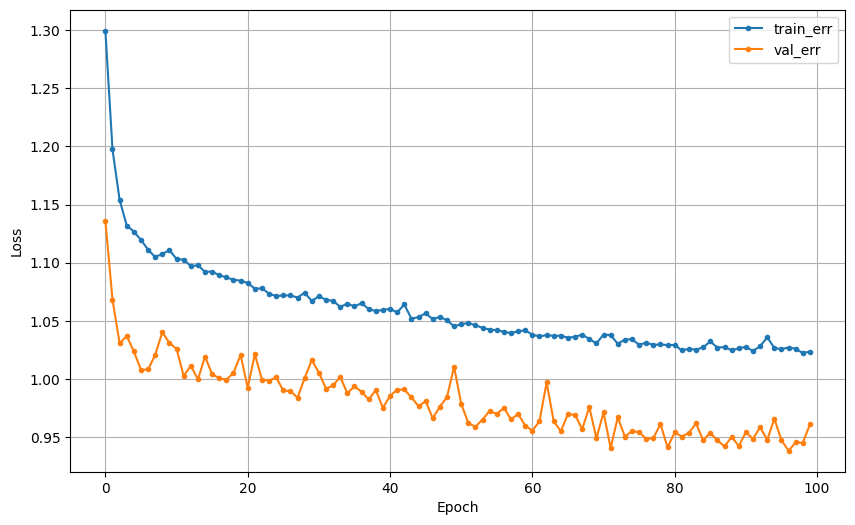

In [74]:
dl_history_plot(hist2)

In [75]:
pred2 = model2.predict(x_val)
pred2 = pred2.argmax(axis=1)
pred2[:5]

46/46 [==============================] - 0s 2ms/step


array([2, 2, 2, 2, 2])

In [76]:
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[  9  33  19   0   0]
 [  8 220 200  10   0]
 [  4 107 475  73   1]
 [  0   2 169  79   0]
 [  0   0  29  32   0]]
              precision    recall  f1-score   support

           0       0.43      0.15      0.22        61
           1       0.61      0.50      0.55       438
           2       0.53      0.72      0.61       660
           3       0.41      0.32      0.36       250
           4       0.00      0.00      0.00        61

    accuracy                           0.53      1470
   macro avg       0.40      0.34      0.35      1470
weighted avg       0.51      0.53      0.51      1470



### (3) 모델3

In [67]:
clear_session()

model3 = Sequential([Dense(10, input_shape=(n,), activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(5, activation='relu'),
                     Dense(5, activation='softmax')])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
Total params: 283 (1.11 KB)
Trainable params: 283 (1.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model3.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')

hist3 = model3.fit(x_train, y_train, epochs=50, validation_split=.2, verbose=0).history

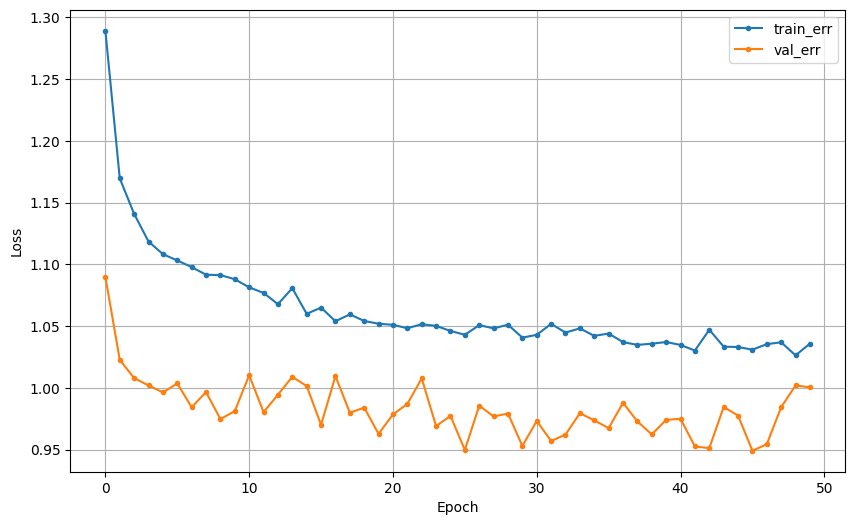

In [69]:
dl_history_plot(hist3)

In [70]:
pred3 = model3.predict(x_val)
pred3 = pred3.argmax(axis=1)
pred3[:5]

46/46 [==============================] - 0s 3ms/step


array([2, 2, 2, 1, 2])

In [71]:
print(confusion_matrix(y_val, pred3))
print(classification_report(y_val, pred3))

[[  4  39  18   0   0]
 [  1 322 112   3   0]
 [  0 238 408  14   0]
 [  0  21 194  35   0]
 [  0   1  47  13   0]]
              precision    recall  f1-score   support

           0       0.80      0.07      0.12        61
           1       0.52      0.74      0.61       438
           2       0.52      0.62      0.57       660
           3       0.54      0.14      0.22       250
           4       0.00      0.00      0.00        61

    accuracy                           0.52      1470
   macro avg       0.48      0.31      0.30      1470
weighted avg       0.51      0.52      0.48      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
